&#x1f12f; Javier Bejar - APA/GEI/FIB/UPC

In [1]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
# !pip install pandas --upgrade  --quiet
# !pip install numpy --upgrade  --quiet
# !pip install scipy --upgrade  --quiet
# !pip install statsmodels --upgrade  --quiet
# !pip install scikit-learn --upgrade  --quiet
!pip install missingno --upgrade  --quiet
!pip install apafib --upgrade --quiet

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time
from datetime import timedelta
init_time = time()

# APA - Laboratorio - Sesión 1
## Introducción

En esta sesión trabajaremos el proceso básico del análisis de un conjunto de datos para entrenar modelos de aprendizaje. 

Seguiremos una metodología que sigue una serie de pasos que nos ayudarán a procesar los datos desde su fuente original hasta los datos que usaremos para entrenar el modelo. 

Siempre que tratemos con datos deberemos primero analizarlos utilizando al menos una estadística descriptiva básica y la visualización de los datos para entender su comportamiento y detectar los posibles problemas que puedan presentar.

Al trabajar con un conjunto de datos, dado que querremos medir la calidad del modelo que entrenaremos deberemos dividir los datos y reservar una parte para estimar esa calidad. 

Asumiendo que el conjunto de datos corresponde a muestras iid dividiremos aleatoriamente los datos en conjunto de **entrenamiento** y conjunto de **test** seleccionando unos porcentajes (por ejemplo 70%/30%). Dependiendo de la estrategia de selección de hiper parámetros que escojamos también podemos a su vez dividir el conjunto de entrenamiento en dos, en ese caso tendremos un conjunto de entrenamiento y otro de **validación**. Esto dependerá de la cantidad de datos que tengamos y del coste computacional del ajuste de los hiper parámetros.

El análisis de los datos se hará siempre con el conjunto de **entrenamiento**, cualquier preproceso que hagamos a este lo tendremos que aplicar al conjunto de **test** usando las transformaciones obtenidas a partir del conjunto de entrenamiento (**no hacerlo así es un error grave**)




Los pasos que seguiremos en este y en el resto de sesiones de laboratorio y que deberíais seguir en el desarrollo de la práctica serán los siguientes:

1. Carga de los datos
2. Obtención de la estadística descriptiva
3. Visualización de las variables de manera individual y detección de anormalidades
4. Partición en datos de entrenamiento y test
5. Preproceso de los datos (**El oden los pasos puede depender de que metodos apliquemos**)
   1. Transformación de variables 
      1. Cambio de codificación
      2. Discretización
   2. Corrección de valores
      1. Imputación de valores perdidos
      2. Detección/corrección de valores extremos
   3. Generación de variables
   4. Selección de variables
   5. Normalización/Escalado
   6. Reducción de dimensionalidad/Visualización con métodos de reducción de dimensiones
6. Entrenamiento de modelos
   1. Selección de las medidad de calidad del modelo de acorde con el tipo de tarea
   2. Para cada tipo de modelo:
      1. Selección de los hiper parámetros a probar
      2. Selección de la estrategia de búsqueda sobre el espacio de hiperparámetros
      3. Ajuste del modelo para cada conjunto de hiperparámetros
      4. Selección del mejor modelo acorde a las medidas de calidad
      5. Validación del modelo/modelos con el conjunto de test (vuelta atrás si es necesario)
7. Selección del mejor modelo

## Carga de los datos

La gestión de los datos en aprendizaje depende del problema con el que estamos tratando. La fuente puede ser un simple fichero (o sistema de ficheros) o una base de datos (SQL/NoSQL). 

El formato en el que pueden estar los datos también es bastante diverso dependiendo de su tamaño o su tipología. Si el tamaño es pequeño pueden estar en ficheros de texto con un formato que siga una estructura, si el tamaño es grande hay multitud de formatos que permiten un acceso más eficiente que permite incluso ir cargando los datos a media que sean necesarios.

Los datos tabulares son los más sencillos de tratar, pero existen multitud de formatos para datos más complejos como imagenes, señales, texto o grafos. Por lo general nosotros trabajaremos con datos tabulares.

### Librerias para datos tabulares

En la asignatura trabajaremos con dos librerias para trabajar con este tipo de datos: Pandas (https://pandas.pydata.org/) y Numpy (https://numpy.org/).

La primera permite trabajar de manera más sencilla la manipulación y transformación de los datos. La segunda permite realizar cálculos de manera más eficiente una vez tengamos los datos transformados para entrenar un modelos de aprendizaje o para hacer transformaciones/manipulaciones más complejas.

Veremos con un ejemplo los elementos básicos de Pandas a partir de los diferentes pasos que iremos siguiendo.

La mejor referencia sobre lo que permite hacer Pandas la podéis encontrar en el tutorial de su documentación _10 minutes to pandas_ (https://pandas.pydata.org/pandas-docs/dev/user_guide/10min.html)



In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

Cargaremos el conjunto de datos Titanic (https://www.kaggle.com/c/titanic) que tiene como objetivo el predecir la supervivencia de los pasajeros de este barco a partir de sus características. Este esta en formato CSV, pero Pandas puede cargar datos en muchos formatos. Nosotros lo obtendremos directamente usando la librería _apafib_ usando ```load_titanic```.

**Importante:** Debemos leer la documentación de los datos antes de empezar a trabajar con ellos, necesitamos saber como estan codificados los valores para que puedan ser obtenidos correctamente. Por ejemplo, debemos saber como se han codificado los valores perdidos si es que hay alguno. Esto se puede hacer de muchas maneras y hay que indicárselo a la función que carga los datos si no sigue alguna de las convenciones estándar.

No tenemos ya una división en un conjunto de entrenamiento y otro de test. Lo haremos más adelante antes de hacer el preproceso de los datos.

Primero visualizaremos las primeras filas del conjunto de datos.

In [4]:
try:
    from apafib import load_titanic
    titanic = load_titanic()
except: 
    titanic = pd.read_csv("./titanic.csv", header=0, delimiter=',')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000,0,0,24160,211.338,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.917,1,2,113781,151.550,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000,1,2,113781,151.550,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000,1,2,113781,151.550,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000,1,2,113781,151.550,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Podemos ver por las primeras filas que tenemos datos que son de diferentes tipos (numéricos, categóricos) y valores desconocidos marcados como NaN (Not a number).


## Estadística descriptiva

Pandas nos permite ver la estadístca descriptiva de todas las variables

En caso de conjuntos de datos muy grandes puede ser poco práctico mirarse estas estadisticas.

In [6]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,1309.0,NaN,NaN,NaN,2.295,0.838,1.0,2.0,3.0,3.0,3.0
survived,1309.0,NaN,NaN,NaN,0.382,0.486,0.0,0.0,0.0,1.0,1.0
name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881,14.413,0.167,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.499,1.042,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.385,0.866,0.0,0.0,0.0,0.0,9.0
ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,1308.0,NaN,NaN,NaN,33.295,51.759,0.0,7.896,14.454,31.275,512.329
cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos eliminar aquellas variables que no servirán para la tarea objetivo, por ejemplo variables que sean identificadores

In [ ]:
titanic.drop(columns=['cabin', 'name', 'ticket', 'boat', 'body', 'home.dest'], inplace=True)

In [9]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,1309.0,NaN,NaN,NaN,2.295,0.838,1.0,2.0,3.0,3.0,3.0
survived,1309.0,NaN,NaN,NaN,0.382,0.486,0.0,0.0,0.0,1.0,1.0
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881,14.413,0.167,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.499,1.042,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.385,0.866,0.0,0.0,0.0,0.0,9.0
fare,1308.0,NaN,NaN,NaN,33.295,51.759,0.0,7.896,14.454,31.275,512.329
embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver que valores hay en las variables categóricas

In [10]:
titanic.embarked.unique()
titanic.sex.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

array(['female', 'male'], dtype=object)

Reordenaremos las columnas de manera que la variable respuesta sea la primera

In [11]:
cols = list(titanic.columns)
cols.remove('survived')
cols.insert(0, 'survived')
titanic = titanic.reindex(columns=cols)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.000,0,0,211.338,S
1,1,1,male,0.917,1,2,151.550,S
2,0,1,female,2.000,1,2,151.550,S
3,0,1,male,30.000,1,2,151.550,S
4,0,1,female,25.000,1,2,151.550,S


## Visualización básica

Esto nos dará una visión preliminar de las características de los datos, pero no podremos decidir mucho sin una visualización.

Pandas permite hacer bastantes visualizaciones (https://pandas.pydata.org/pandas-docs/dev/user_guide/visualization.html), pero tambien podemos emplear otras librerias para tener más control sobre que se representa o obtener visualizaciones más complejas como matplotlib (https://matplotlib.org/) y seaborn (https://seaborn.pydata.org/). 

En el caso de gran número de variables podemos visualizar algunas varariables escogidas pasando diferentes test a las variables individuales comprobando por ejemplo cuantos valores diferentes tienen, pasando test estadísticos o detectando valores que pueden ser anormales dada la naturaleza de los datos, obviamente cada dominio será diferente asi que hay que conocerlo para poder decidir que cosas comprobar y que restricciones aplicar.

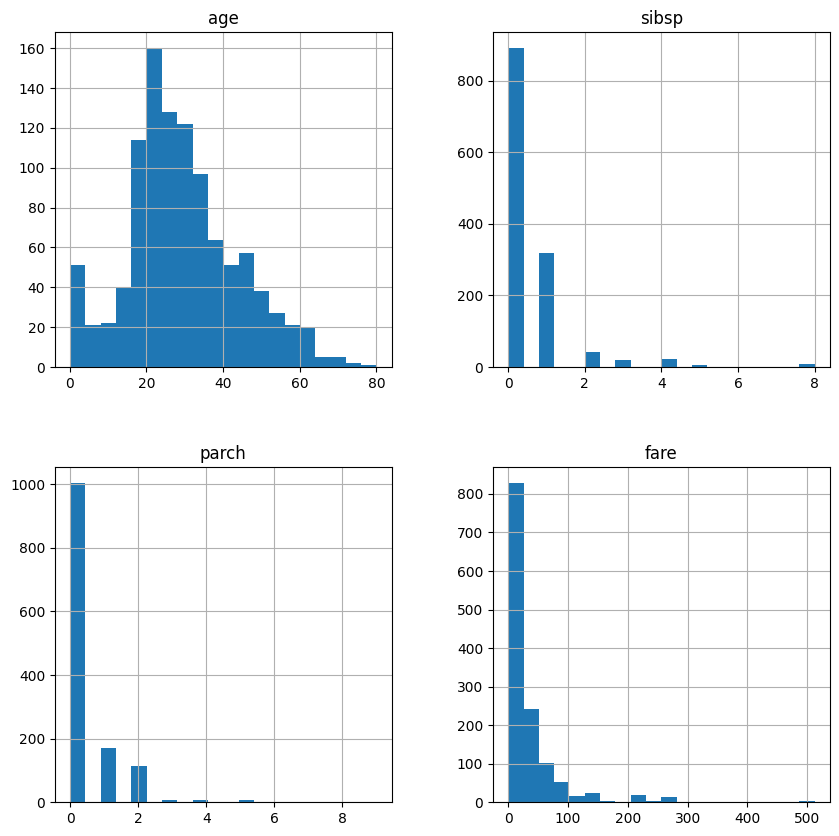

In [12]:
titanic.loc[:,['age', 'sibsp', 'parch', 'fare']].hist(bins=20, figsize=(10,10));

Podemos comprobar si las variables numéricas siguen la distribución normal usando test estadísticos para ese fin. En algunos modelos la hipótesis es de normalidad de variables, no siempre se ha de cumplir estrictamente, pero es bueno saber si es cierto. 

In [14]:
from scipy.stats import normaltest

print(normaltest(titanic['age'], nan_policy='omit'))
print(normaltest(titanic['fare'], nan_policy='omit'))

NormaltestResult(statistic=np.float64(28.167636798132648), pvalue=np.float64(7.646723472885242e-07))
NormaltestResult(statistic=np.float64(1215.5650756738717), pvalue=np.float64(1.1050899269263655e-264))


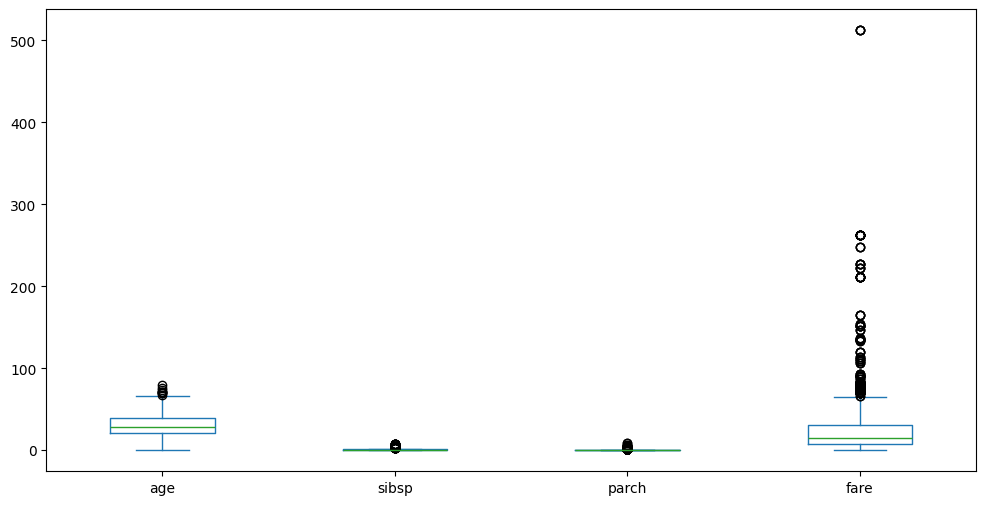

In [15]:
titanic.loc[:,['age', 'sibsp', 'parch', 'fare']].plot.box(figsize=(12,6));

Necesitaremos hacer también visualizaciones cruzando las variables, incluso con la variable respuesta para observar si hay diferencias.

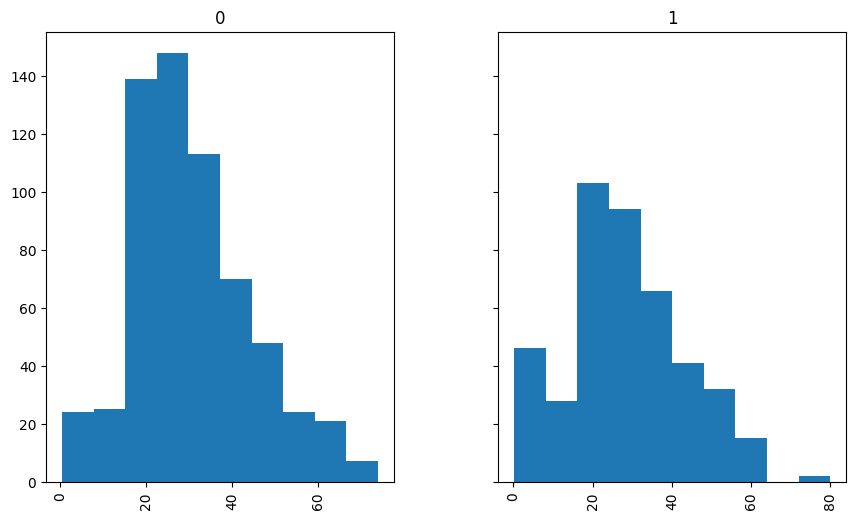

In [16]:
titanic.hist(column='age',by='survived',bins=10, sharey=True, figsize=(10,6), layout=(1,2));

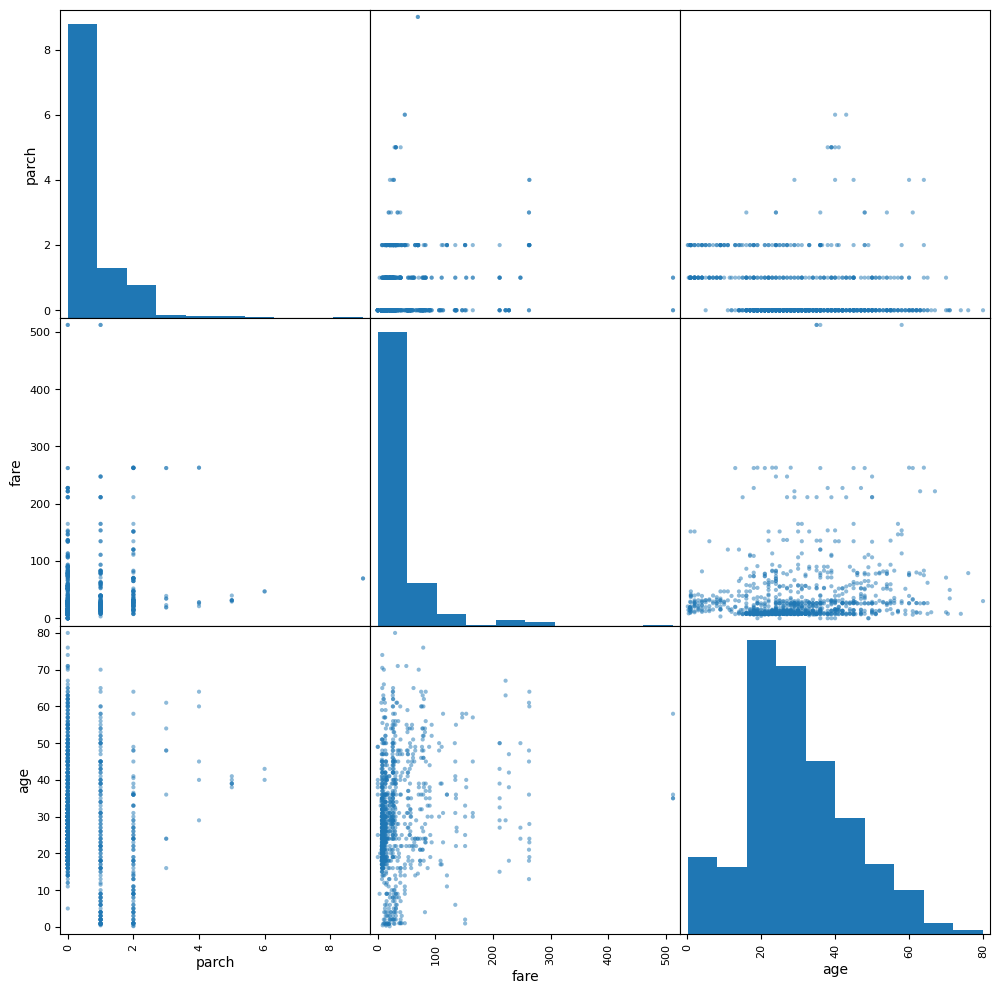

In [17]:
scatter_matrix(titanic.loc[:,['parch', 'fare', 'age']],figsize=(12,12));

Seaborn es una librería para visualización de datos que facilita hacer ciertas visualizaciones y se integra con pandas, matplotlib permite un mayor control sobre como se representan los datos. Existen múltiples librerias de visualización com mayor o menor complejidad y control que permiten graficos estáticos o dinámicos (plotnine, dash/plotly, bokeh).

Las visualizaciones son importantes sobre todos para entender los datos y sus interacciones y explicar los resultados.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Podemos visualizar grupos de variables con relación a la variable respuesta

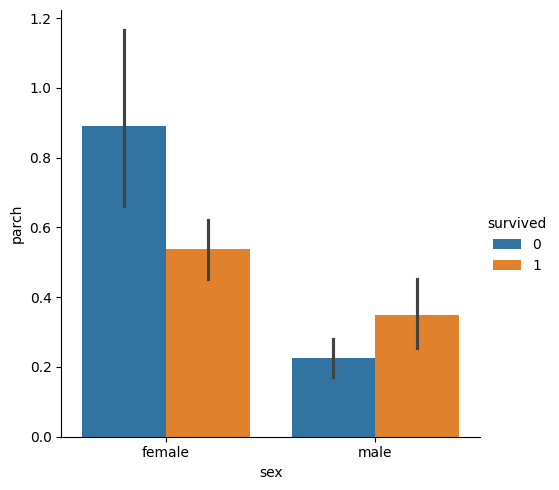

In [19]:
g = sns.catplot(data=titanic, kind="bar", x="sex", y="parch", hue="survived")

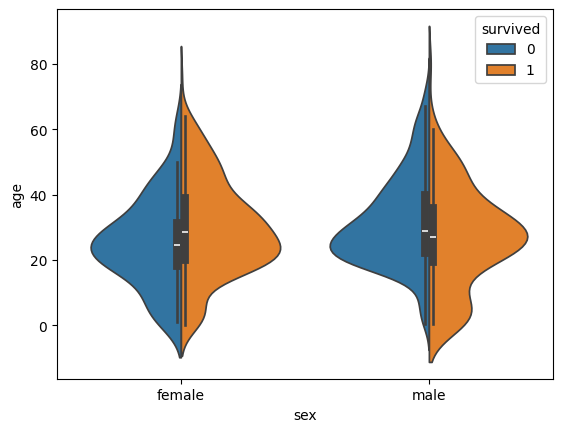

In [20]:
sns.violinplot(data=titanic, x="sex", y="age", hue="survived", split=True);

Podemos visualizar también la relación entre las diferentes variables calculando funciones estadísticas que nos indiquen las relaciones que pueden tener entre ellas, por ejemplo su correlación.

In [22]:
corr = titanic.corr(numeric_only=True)
corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000,-0.312,-0.056,-0.028,0.083,0.244
pclass,-0.312,1.000,-0.408,0.061,0.018,-0.559
age,-0.056,-0.408,1.000,-0.244,-0.151,0.179
sibsp,-0.028,0.061,-0.244,1.000,0.374,0.160
parch,0.083,0.018,-0.151,0.374,1.000,0.222
fare,0.244,-0.559,0.179,0.160,0.222,1.000


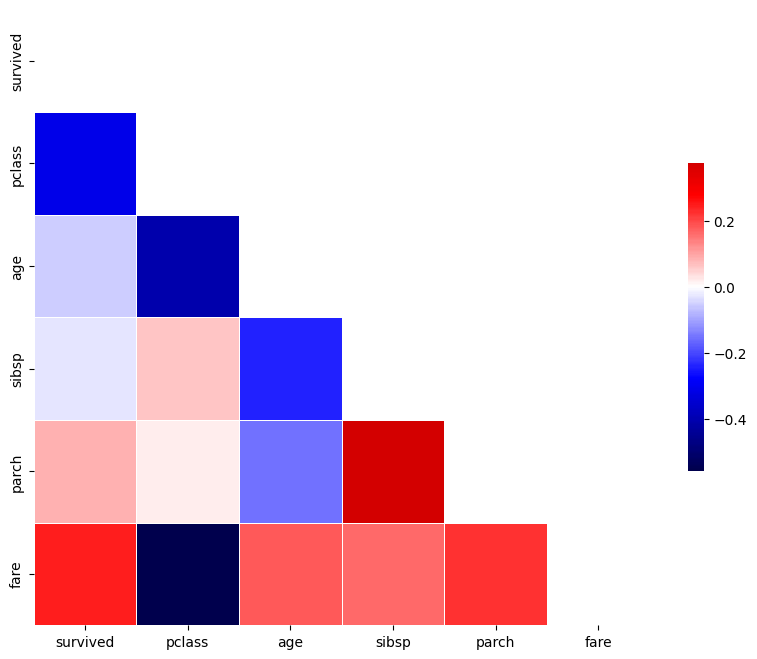

In [23]:
corr = titanic.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Podemos visualizar también esas relaciones en grupo de diferentes maneras

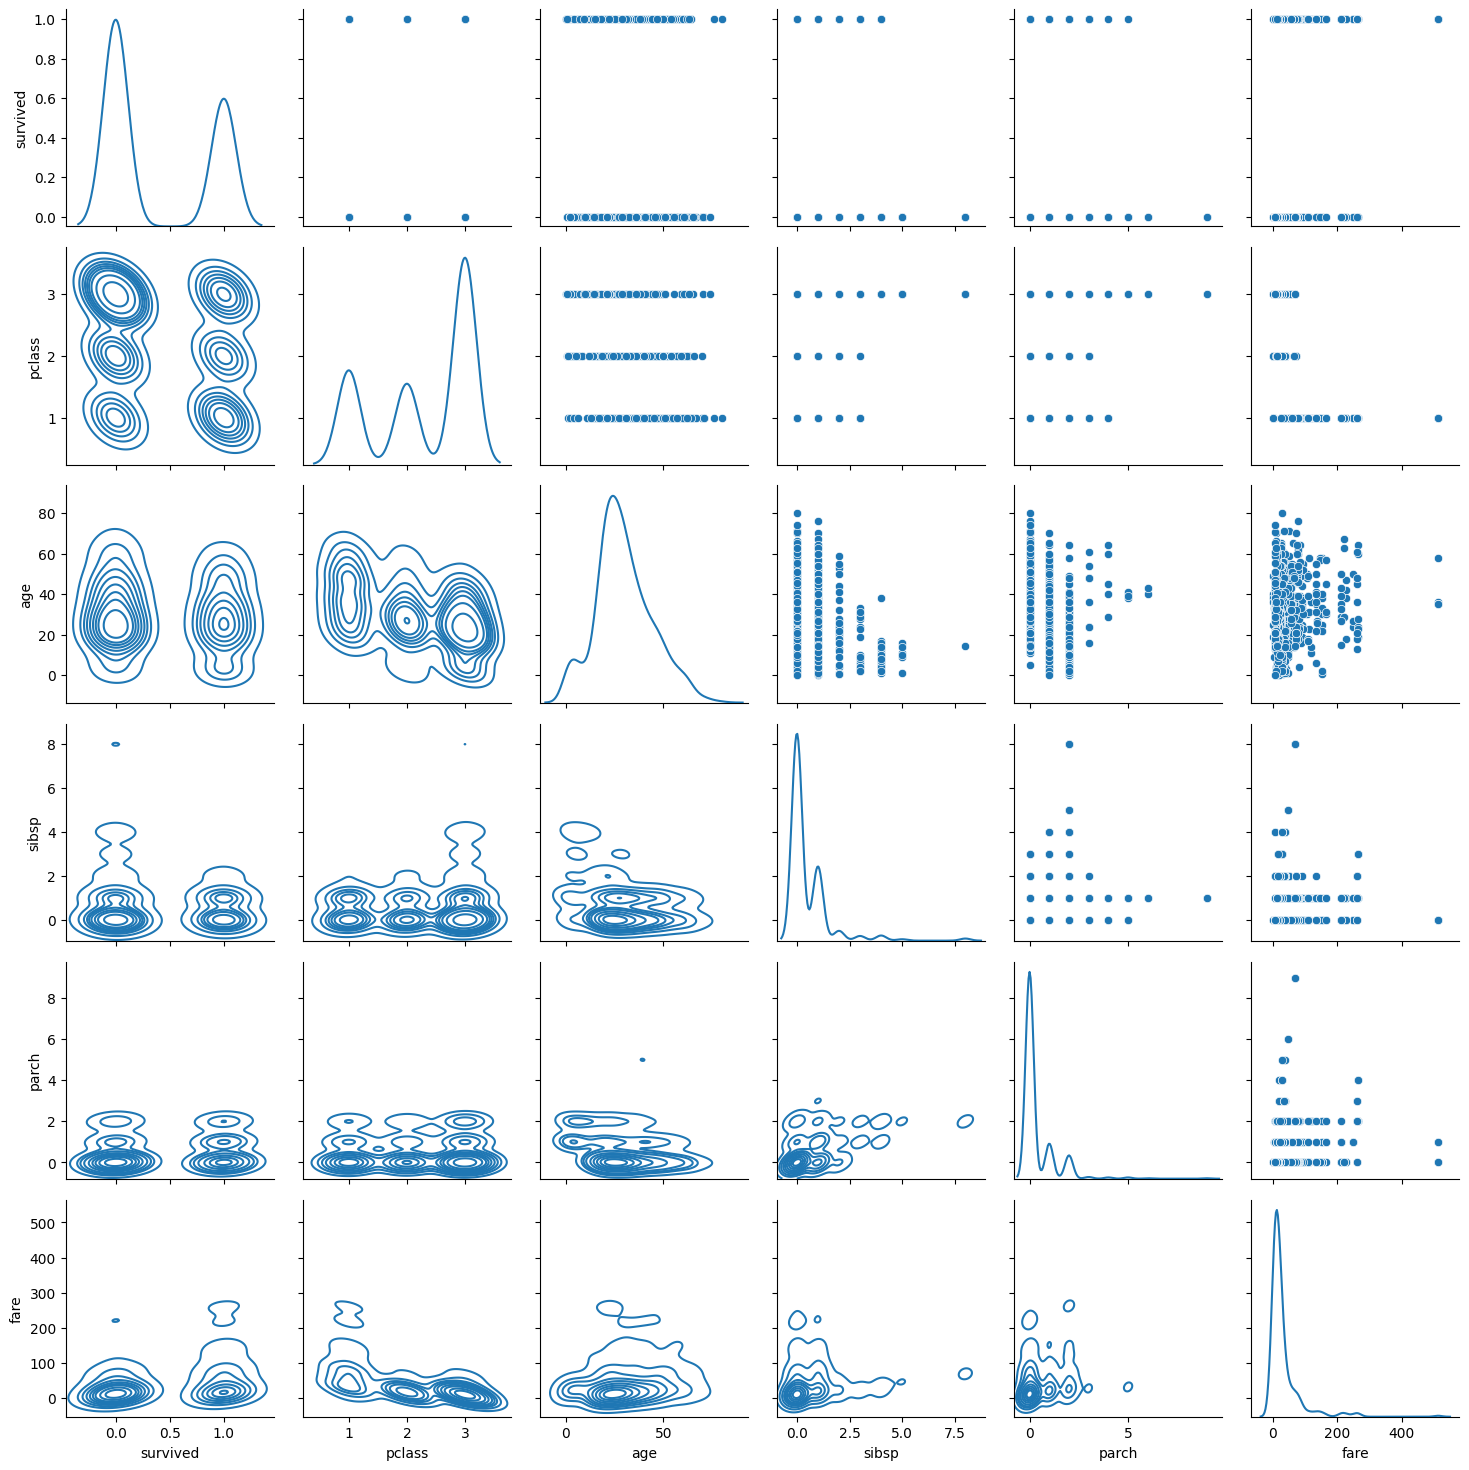

In [24]:
g = sns.PairGrid(titanic, diag_sharey=False)
g.map_upper(sns.scatterplot);
g.map_lower(sns.kdeplot);
g.map_diag(sns.kdeplot);

## Partición del conjunto de datos

Partiremos el conjunto de datos en datos de entrenamieto y test.

Los datos de test **no los tocaremos hasta el final** y les aplicaremos el preproceso calculado con el conjunto de entrenamiento.

Fijamos el random_state que se usa para el generador de números aleatorios para poder reproducir los resultados

In [25]:
from sklearn.model_selection import train_test_split

titanic_train, titanic_test = train_test_split(titanic, test_size=0.3, random_state=0)

titanic_train.shape, titanic_test.shape

((916, 8), (393, 8))

## Preproceso de los datos

Podemos hacer múltiples transformaciones a los datos para corregir problemas o adaptarlos al tipo de modelo que vamos a utilizar, asi que lo que hagamos dependerá de los datos, del problema a resolver y del modelo a utilizar.

El orden en el que apliquemos el preproceso depende de que transformaciones hagamos. Si todas las transformaciones son independiente no importara, si alguna transformación de una variable depende de otras (todas las) variables podemos necesitar haber transformado/corregido el resto para poder aplicarla.


## Transformación de variables

### Recodificación

Por lo general trataremos con datos numéricos, eso implica convertir las variables categóricas a numéricas de alguna manera. La transformación específica dependerá de si la variable categórica tiene un orden o no, o si ese orden es significativo para nuestro problema.

Por ejemplo, en este conjunto de datos ya tenemos una variable categórica que ha sido transformada a numérica **pclass** que tiene tres valores [1,2,3], podemos asumir que ese orden y los valores asignados ya representan la información que necesitamos.

Aparte de estas dos, tenemos las variables **sex** y **embarked**, la primera es binaria, asi que simplemente asignando valores [0,1] ya se corresponde a una variable numérica. La otra tiene tres valores y no tienen un orden específico. La forma habitual de convertir estas variables es generar una variable binaria para cada una de ellas donde tenemos un valor 1 en la variable que corresponde al valor que tiene el ejemplo y 0 en el resto. Esto se denomina **One-Hot encoding**.

Podemos hacer estas transformaciones usando Pandas o scikit-learn.

Scikit-learn permite mas tipos de preprocesado (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), pero los preprocesados sencillos a veces es mejor hacerlos con Pandas.

Antes de hacer la transformación debermos comprobar que no haya valores perdidos en estas variables. Si es el caso podemos tratarlos ahora si su numero es pequeño, si no lo es podemos necestitar hacer un tratamiento más complejo

In [26]:
titanic_train['sex'].isna().sum(), titanic_train['embarked'].isna().sum()

(np.int64(0), np.int64(2))

La variable _embarked_ solo tiene dos valores perdidos, podemos simplemente asignarles el valor más frecuente o eliminar los ejemplos. Haremos lo primero y nos guardaremos la decisión para hacer lo mismo en el conjunto de test.

In [27]:
titanic_train.loc[titanic_train['embarked'].isna(),'embarked'] = 'S'

In [28]:
# Convertimos la variable a categorica y la reescribimos con los codigos numericos que corresponden a cada categoria
titanic_train['sex'] = titanic_train['sex'].astype('category').cat.codes

Al convertir una variable en **One-Hot encoding** es habitual eliminar una de las columnas, ya que una siempre es una combinación lineal de las otras y algunos modelos no admiten que eso suceda en la matriz de datos.

In [ ]:
# Generamos c-1 variables, las añadimos al dataframe y eliminamos la variable
dummies = pd.get_dummies(titanic_train['embarked'], drop_first=True, prefix='embarked', prefix_sep='_')
dummies

In [32]:
titanic_train = pd.concat([titanic_train,dummies], axis=1)
titanic_train.drop(columns=['embarked'], inplace=True)
titanic_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
501,1,2,0,13.0,0,1,19.500,False,True
588,1,2,0,4.0,1,1,23.000,False,True
402,1,2,0,30.0,1,0,13.858,False,False
1193,0,3,1,NaN,0,0,7.725,True,False
686,1,3,0,22.0,0,0,7.725,True,False


## Corrección de valores

Hay una serie de problemas básicos en los valores de las variables que tendremos que analizar

- Presencia de valores perdidos (missing values)
- Presencia de valores extremos (outliers)

### Valores perdidos

Los ejemplos con valores perdidos no los podremos usar en la mayoría de los modelos, asi que tenemos dos opciones:
- Eliminarlos del conjunto de datos
- Substituir su valor por otro que no distorsiones los datos y sea plausible (esto se denomina imputación)

De momento hemos tratado valores perdidos ya en dos variables, podemos primero ver cuantos valores perdidos hay y como se distribuyen en el resto de variables.

Tendremos codificados los valores perdidos con NaN, podemos contar cuantos tenemos

In [33]:
titanic_train.isna().sum()

survived        0
pclass          0
sex             0
age           175
sibsp           0
parch           0
fare            0
embarked_Q      0
embarked_S      0
dtype: int64

Los valores perdidos pueden presentar patrones que pueden indicar cosas interesantes en los datos, pueden ser totalmente aleatorios o estar relacionados entre las diferentes columnas, en este caso la librería **missingno** permite visualizar los ejemplos perdidos y ver si existen esos patrones.

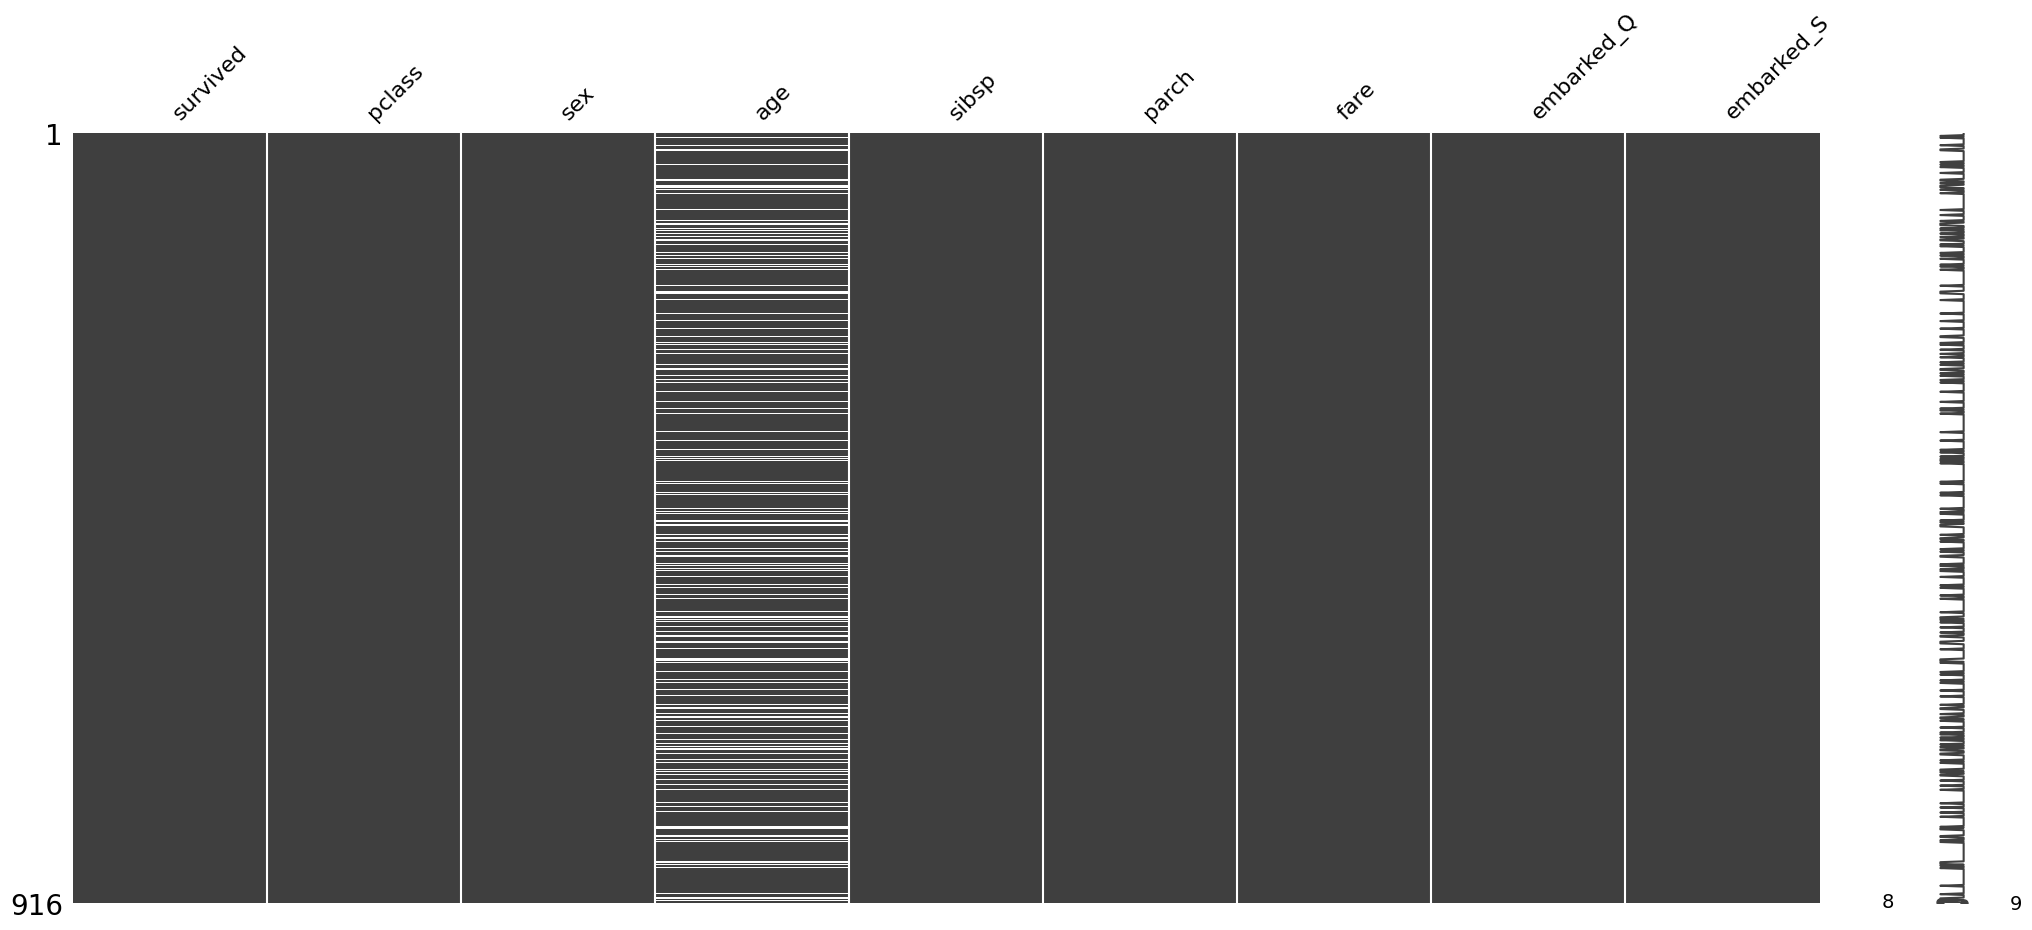

In [34]:
import missingno as msno
msno.matrix(titanic_train);

Podemos ver que la variable más problematica es la edad. No hay una manera sencilla de imputar la edad de los pasajeros que no tienen esa información. En este caso tenemos varias opciones.

- Eliminar todos los ejemplos en los que desconozcamos la edad
- Eliminar la variable edad
- Imputar la variable edad sin que distorsione mucho la distribución de esa variable
- Dejar los datos tal cual y usar algún método capaz de trabajar con datos incompletos

Si el tamaño del conjunto de datos no es muy grande o la proporción de valores perdidos es muy grande es mejor evitar perder datos. También es probable que la variable tenga sentido para nuestro problema, asi que podemos intentar imputar sus valores de la manera más neutra posible.

La manera habitual es usar algún valor dependiente del dominio o algún valor calculado a partir de la estadística de los datos como la media o la moda. Eso no cambiará la media de los datos pero reducirá su variancia. También puede introducir interacciones con otras variables que pueden dar resultados extraños.

También podemos prever encontrar valores perdidos en la muestra de test. Eso quiere decir que debemos decidir que hacer con ellos ahora.

Por ejemplo, conociendo el conjunto de datos podemos darnos cuenta de que el precio depende de la clase del pasajero, una posibilidad con sentido sería imputar estos valores como la media de los valores de esta variable de acuerdo a la variable _pclass_. Calculamos estas medias con el conjunto de entrenamiento por si nos hiciera falta.

In [35]:
fare1 = titanic_train.loc[titanic_train['pclass']==1, 'fare'].mean()
fare2 = titanic_train.loc[titanic_train['pclass']==2, 'fare'].mean()
fare3 = titanic_train.loc[titanic_train['pclass']==3, 'fare'].mean()

fare1, fare2, fare3

(np.float64(83.94491130434784),
 np.float64(19.778235638297872),
 np.float64(13.601847791164658))

Ahora trataremos los valores perdidos en la variable `age`

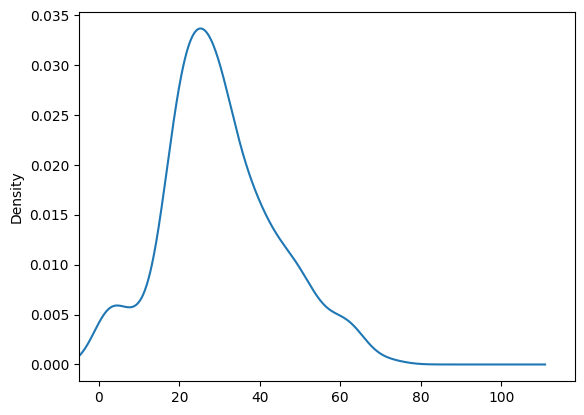

In [36]:
titanic_train['age'].plot.kde().set_xlim(left=-5);
titanic_train['age'].mean(), titanic_train['age'].std()
0;

Podemos calcular su media y usarla para substituir los valores

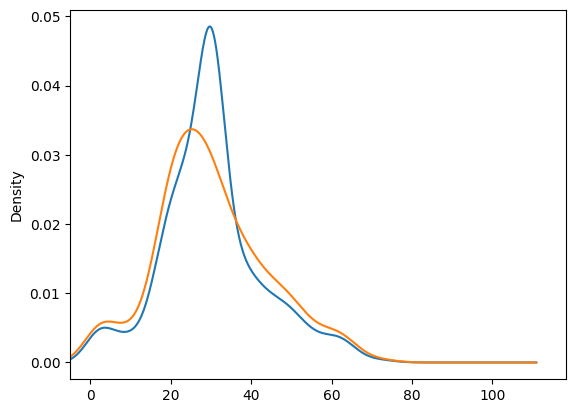

In [37]:
titanic_train['iage'] = titanic_train['age'].copy();
titanic_train.loc[titanic_train['iage'].isna(),'iage'] = titanic_train['iage'].mean();
titanic_train['iage'].plot.kde().set_xlim(left=-5);
titanic_train['age'].plot.kde().set_xlim(left=-5);
titanic_train['iage'].mean(), titanic_train['iage'].std()
0;

Podemos ver claramente como se ha reducido la variancia de los datos y como ha cambiado su distribución.

Otra opción es intentar predecidir los valores perdidos usando un modelo. El más sencillo predice el valor perdido a partir de los k-vecinos más cercanos. Este está implementado en el método KNNImputer de scikit-learn.

*Importante:* No debemos utilizar la variable respuesta para la imputación, estaríamos sesgando el resultado, fijaos que cuando hagamos la imputación en datos nuevos no conoceremos esa variable.

Elegimos un conjunto de vecinos con los que calcular la imputación y nos quedamos con la variable que corresponde a la edad.

In [38]:
from sklearn.impute import KNNImputer
data = titanic_train.loc[:,'pclass':'embarked_S'].values

knni_age = KNNImputer(n_neighbors=10)

iage = knni_age.fit_transform(data)[:,2]

También convertimos los valores a enteros que es como está el resto

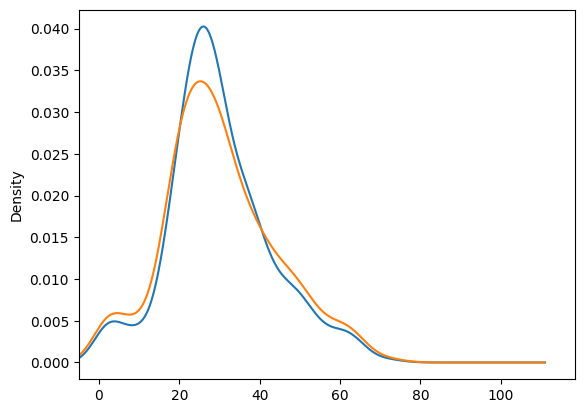

In [39]:
titanic_train['iage'] = iage
titanic_train['iage'] = titanic_train['iage'].astype(int)
titanic_train['iage'].plot.kde().set_xlim(left=-5);
titanic_train['age'].plot.kde().set_xlim(left=-5);
'Media:', titanic_train['iage'].mean(), 'Varianza:', titanic_train['iage'].std()
0;

Podemos ver que la distorsión es menor. Deberíamos probar con diferentes numeros de vecinos para ver que resultado es más satisfactorio. Nos quedaremos con este modelo para poder hacer imputación de esta variable en los datos de test.

In [40]:
titanic_train.drop(columns=['age'], inplace=True)

Ahora ya tenemos un conjunto de datos completo

In [41]:
titanic_train.isna().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
embarked_Q    0
embarked_S    0
iage          0
dtype: int64

### Valores extremos

Los valores extremos son valores que se salen de la distribución de la variable, pueden ser un problema para algunos modelos ya que estos se pueden fijar demasiado en ellos reduciendo su generalidad, pero algunos modelos son tolerantes a este tipo de problemas.


Un criterio sencillo para decidir que valores son extremos en una variable es usar la distancia intercuartil (Inter Quartile Range IQR). Especificamente, se pueden definir como valores extremos: 
* Valores más pequeños que Q1 - 1.5*IQR
* Valores más grandes que  Q3 + 1.5*IQR

Esto asume **gausianidad** en los datos, asi que puede no ser un buen criterio si la variable se desvía bastante o es una distribución compleja. En caso de que la variable no sea gausiana dependiendo del tipo de distribución se puede transformar a algo más cercano a la distribución gausiana con diferentes transformaciones. **Ante la duda, es mejor no usar este criterio para eliminar valores**.

Este es el criterio para marcarlos que se usan en los boxplot. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png" alt="nice_image_from_wikipedia" width="450"/>

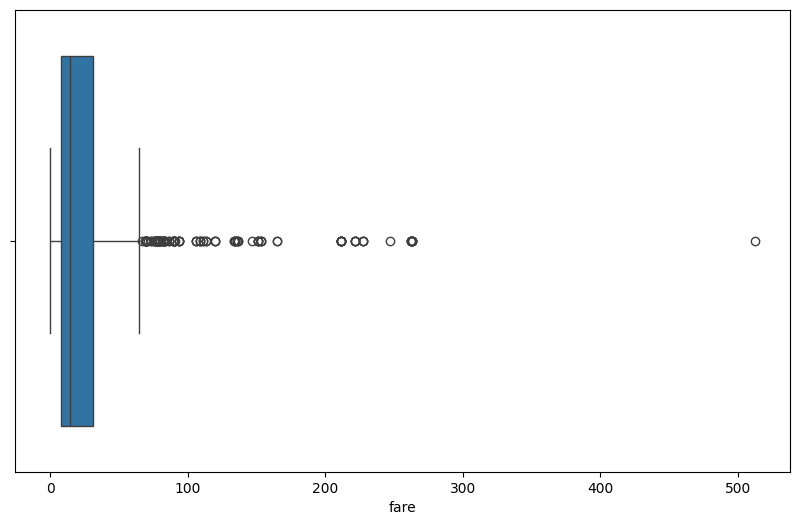

In [42]:
plt.figure(figsize=(10,6));
sns.boxplot(data=titanic_train, x="fare");

Estos serían los puntos de corte de los intercuartiles asumiendo gausianidad

In [43]:
Q1 = titanic_train['fare'].quantile(0.25)
Q3 = titanic_train['fare'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(np.float64(7.8958), np.float64(31.275), np.float64(23.379199999999997))

Aplicando estos cortes podemos eliminar los valores que están en los extremos

In [44]:
small_outliers = titanic_train['fare'] < (Q1 - 1.5 * IQR)
big_outliers = titanic_train['fare'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 122)

In [45]:
titanic_train['fare'] [small_outliers | big_outliers].head()

294    110.883
2      151.550
182    106.425
200     75.242
272     82.267
Name: fare, dtype: float64

Si representamos los valores podemos ver en el boxplot que hay menos valores extremos. Si nos fijamos en el diagrama de densidad
podemos ver en este caso que la variable no es univariante, hay claramente tres distribuciones combinadad que corresponden a las
tres categorias de billetes del Titanic. En este caso no seria muy buena idea usar este criterio para eliminar valores ya que claramente no 
se cumplen los supuestos para aplicarla (gausianidad unimodal)

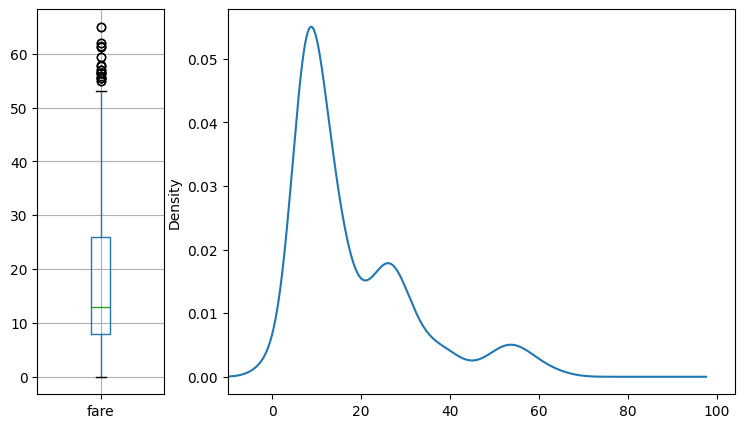

In [46]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
titanic_train[~(small_outliers | big_outliers)].boxplot(column='fare',ax=axes[0]);
titanic_train[~(small_outliers | big_outliers)]['fare'].plot.kde().set_xlim(left=-10);

Otra opción es usar métodos más complejos que no asumen una distribución de los datos y tienen en cuenta todas las dimensiones a la vez. Por ejemplo el método [Local Outlier Factor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor) usa la densidad local de los datos para decidir si un valor es extremo calculándola a partir de los k ejemplos más cercanos.

Este método no lo podemos aplicar si tenemos valores perdidos, asi que hemos de eliminarlos antes.

El método **LocalOutlierFactor** de scikit-learn calcula como de extremo es un ejemplo dependiendo de las distancias que tiene a sus vecinos más cercanos permitiendo obtener un valor que nos ordenará los ejemplos segun lo extremos que sean, a partir de ese valor podemos descartar un porcentaje de los más extremos.

Este método no considera las variables individualmente sino que mira si el ejemplo es en su conjunto, asi que no tiene porque eliminar ejemplos que tienen valores extremos en una sola variable. El método determina automaticamente el porcentaje de ejemplos que son outliers, pero le podemos decir nosotros que porcentaje queremos eliminar.

Fijaos que no nos estamos centrando en una variable solamente, sino en todas a la vez, asi que los ejemplos que se detectan como extemos son ejemplos alejados de las densidades principales de los datos (corresponden a ejemplos en zonas de baja densidad de probabilidad conjunta)

In [47]:
from sklearn.neighbors import LocalOutlierFactor

local_outlier_factor = LocalOutlierFactor(n_neighbors=20)
result = local_outlier_factor.fit_predict(titanic_train.values)

outliers = result == -1 
no_outliers = result == 1

Este es el efecto que tienen en la variable `fare`

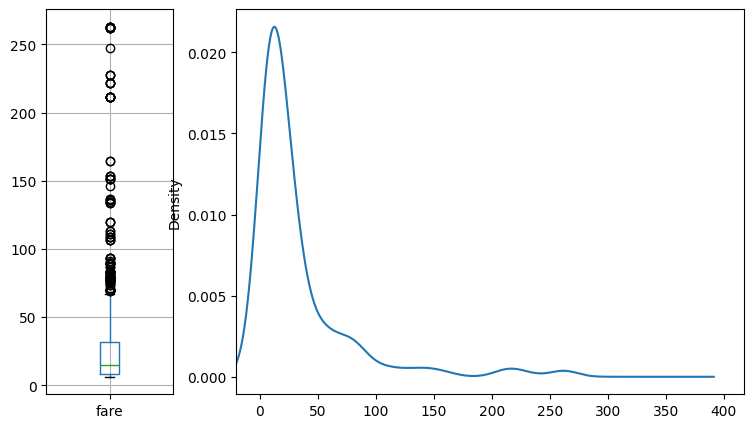

In [49]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
titanic_train[no_outliers].boxplot(column='fare',ax=axes[0]);
titanic_train[no_outliers]['fare'].plot.kde().set_xlim(left=-20);


Hay métodos aún más complejos que podréis encontrar en scikit-learn.

Si consideramos que los ejemplos con valores extremos pueden distorsionar el modelo podríamos eliminarlos, pero también podemos asumir **en este caso** que el precio que se paga por el billete no es una distribución gausiana, además la distribución del precio depende también de la clase del billete, por lo que tenemos realmente tres distribuciones de precios, asi que en este caso haría falta un análisis más complejo.

Podemos dejar la variable como esta ya que puede ser bastante importante para predecir la variable objetivo.

### Discretización

A veces las variables numéricas tienen demasiada granularidad y podría ser más interpretable si las dicretizaramos a valores que podamos entenderlas mejor. Esta discretización se puede hacer según algún criterio específico o usando alguna aproximación de la distribución de los datos.

Para esta tarea Pandas es más flexible permitiendo definir _k_ intervalos para hacer la discretización o hacerla de manera uniforme (https://pandas.pydata.org/docs/reference/api/pandas.cut.html), scikit-learn permite aproximar la distribución de diferentes maneras para hacer la partición (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer).


## Generación de variables

A veces se pueden generar variables derivadas de las originales para hacer más fácil a los modelos sencillos obtener un buen resultado. En la sección de preproceso de scikit-learn hay bastantes opciones.

Una posibilidad para este conjunto de datos que también corresponde con la discretización sería añadir una variable calculada que corresponda a si el pasajero tiene menos de 15 años. Si observamos la distribución de la edad, se puede ver que está compuesta por dos distribuciones que corresponden a la de los niños y los adultos.

Podemos binarizar la variable utilizando la funcion _Binarizer_ pasándole el punto de corte.

In [50]:
from sklearn.preprocessing import Binarizer
bin_age = Binarizer(threshold=16)

titanic_train['adult'] = bin_age.fit_transform(titanic_train['iage'].values.reshape(-1, 1))

## Normalización

Muchos modelos necesitan que las variables estén todas en un mismo rango, habitualmente para que su escala no tenga una influencia en el resultado o para que todas sigan una distribución que tenga los mismos momentos estadísticos, por ejemplo que sean N(0,1).

La sección de preproceso permite hacer estas transformaciones.

Las más habituales son el normalizar las variables de manera que estén todas en un mismo rango (habitualmente [0-1]) o transformarlas para que su media sea 0 y su desviación 1 (asumiendo que son gausianas). Otras transformaciones intentan obtener una distribución que sea más simétrica de manera que los datos se acerquen más a la distribución gausiana aplicando transformaciones no lineales.

* Estandarización: $\frac{X - \mu}{\sigma}$ 
* Escalado Min-max:  $\frac{X - X_{min}}{X_{max} - X_{min}}$
* Transformaciones exponenciales (hace los datos más gausianos): Box-Cox (solo datos positivos) y Yeo-Johnson 


El escalado min-max y la estandarización no tienen misterio, podemos ver el efecto que tienen las otras dos transformaciones.

Yeo-Jonson se puede aplicar a cualquier rango de datos, Box-Cox solo se aplica a datos positivos, en caso de tener valores 0 podemos simplemente añadirles un epsilon para no tener problemas, si tenemos datos negativos habra que ver si tiene sentido el aplicar una traslación para que todos sean positivos.

Si visualizamos la variable _Fare_ como vemos es asimétrica

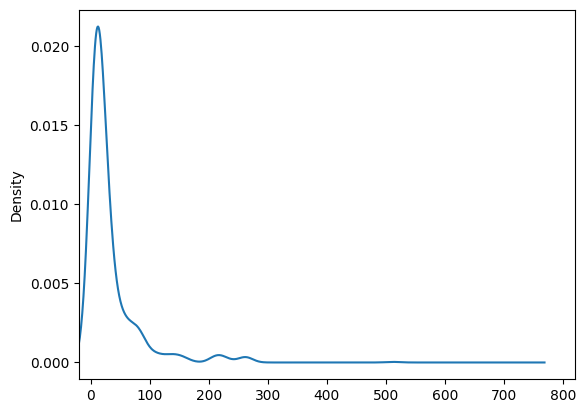

In [51]:
titanic_train['fare'].plot.kde().set_xlim(left=-20);

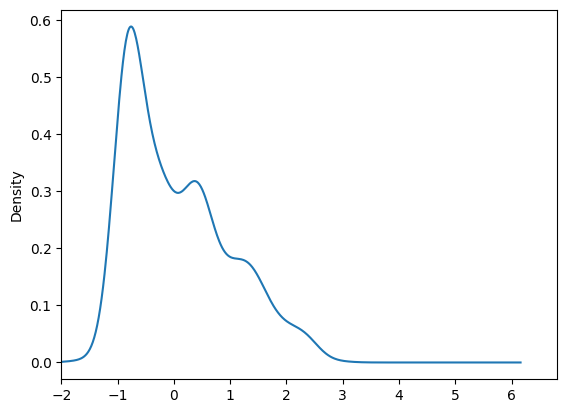

In [52]:
from sklearn.preprocessing import PowerTransformer

yj_power = PowerTransformer(method='yeo-johnson')

titanic_train['fare_yj'] = yj_power.fit_transform(titanic_train['fare'].values.reshape(-1, 1))
titanic_train['fare_yj'].plot.kde().set_xlim(left=-2);

La transformación _Box-Cox_ no admite ceros, podemos simplemente añadirles un epsilon

In [53]:
# Corregimos los 0
titanic_train.loc[titanic_train['fare'] == 0, 'fare'] += 0.01

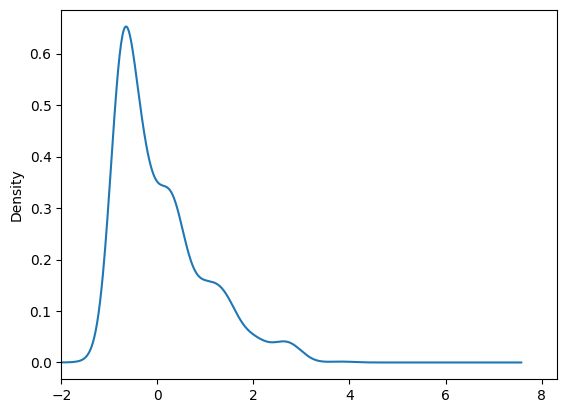

In [54]:
bc_power = PowerTransformer(method='box-cox')

titanic_train['fare_bc'] = bc_power.fit_transform(titanic_train['fare'].values.reshape(-1, 1))
titanic_train['fare_bc'].plot.kde().set_xlim(left=-2);

En este caso no hemos conseguido que se parezca mucho más a una gaussiana aunque Yeo-Johnson permite ver mas claramente las tres distribuciones que se combinan en esta variable.

Podríamos plantearnos si realmente tiene sentido hacer esta transformación en el problema que estamos resolviendo o probar que efecto tiene en el modelo usarla. En todo caso debemos quedarnos con el modelo que hace la transformación para aplicarselo al conjunto de test.

Quedemonos por ejemplo con la transformacion Yeo_Jonhson



In [55]:
titanic_train.drop(columns=['fare', 'fare_bc'], inplace=True)

Finalmente decidiremos si hemos de normalizar o escalar los datos y guardaremos el modelo que hace la transformacion ajustado los los datos de entrenamiento.

Esta transformación no se la hemos de aplicar a la variable respuesta.

Podemos transformar cada variable de manera diferente, pero dado que no tenemos ninguna variable que parezca gausiana y todos los valores son positivos, podemos simplemente escalar todos los valores para que esten en el rango [0-1]

In [57]:
from sklearn.preprocessing import MinMaxScaler

titanic_scaler = MinMaxScaler()
titanic_train.loc[:,'pclass':'fare_yj'] = titanic_scaler.fit_transform(titanic_train.loc[:,'pclass':'fare_yj']);

In [58]:
titanic_train.head()

,survived,pclass,sex,sibsp,parch,embarked_Q,embarked_S,iage,adult,fare_yj
501,1,0.5,0,0.000,0.111,0.0,1.0,0.176,0,0.572
588,1,0.5,0,0.125,0.111,0.0,1.0,0.054,0,0.597
402,1,0.5,0,0.125,0.000,0.0,0.0,0.405,1,0.520
1193,0,1.0,1,0.000,0.000,1.0,0.0,0.500,1,0.430
686,1,1.0,0,0.000,0.000,1.0,0.0,0.297,1,0.430


In [59]:
titanic_train.describe()

,survived,pclass,sex,sibsp,parch,embarked_Q,embarked_S,iage,adult,fare_yj
count,916.000,916.000,916.000,916.000,916.000,916.000,916.000,916.000,916.000,916.000
mean,0.385,0.646,0.634,0.067,0.041,0.091,0.714,0.406,0.909,0.556
std,0.487,0.421,0.482,0.141,0.093,0.287,0.452,0.173,0.287,0.153
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.311,1.000,0.433
50%,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.378,1.000,0.526
75%,1.000,1.000,1.000,0.125,0.000,0.000,1.000,0.500,1.000,0.642
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


A partir de aquí tenemos un conjunto de datos sobre el que podemos trabajar. En la proxima sesión veremos como aplicar técnicas de reducción de dimensionalidad que nos permitar hacer visualizaciones de la estructura de los datos.

## Preproceso del conjunto de test

El conjunto de test aun no lo hemos tocado, estamos tratándolo como si fueran datos nuevos que nos lleguen para aplicar el modelo que hayamos creado con el conjunto de entrenamiento.

Sería incorrecto aplicar el preproceso a estos datos de manera diferente, asi que deberemos guardar el preprocesamiento que hemos hecho para los datos de entrenamiento y aplicárselo tal cual al los datos de test. **Es un error no hacerlo así**



In [60]:
titanic_test.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
1139,0,3,male,38.0,0,0,7.896,S
533,1,2,female,21.0,0,1,21.000,S
459,0,2,male,42.0,1,0,27.000,S
1150,0,3,male,NaN,0,0,14.500,S
393,0,2,male,25.0,0,0,31.500,S


Primero observamos que en el conjunto de test no haya variables con valores perdidos que no sepamos como tratar

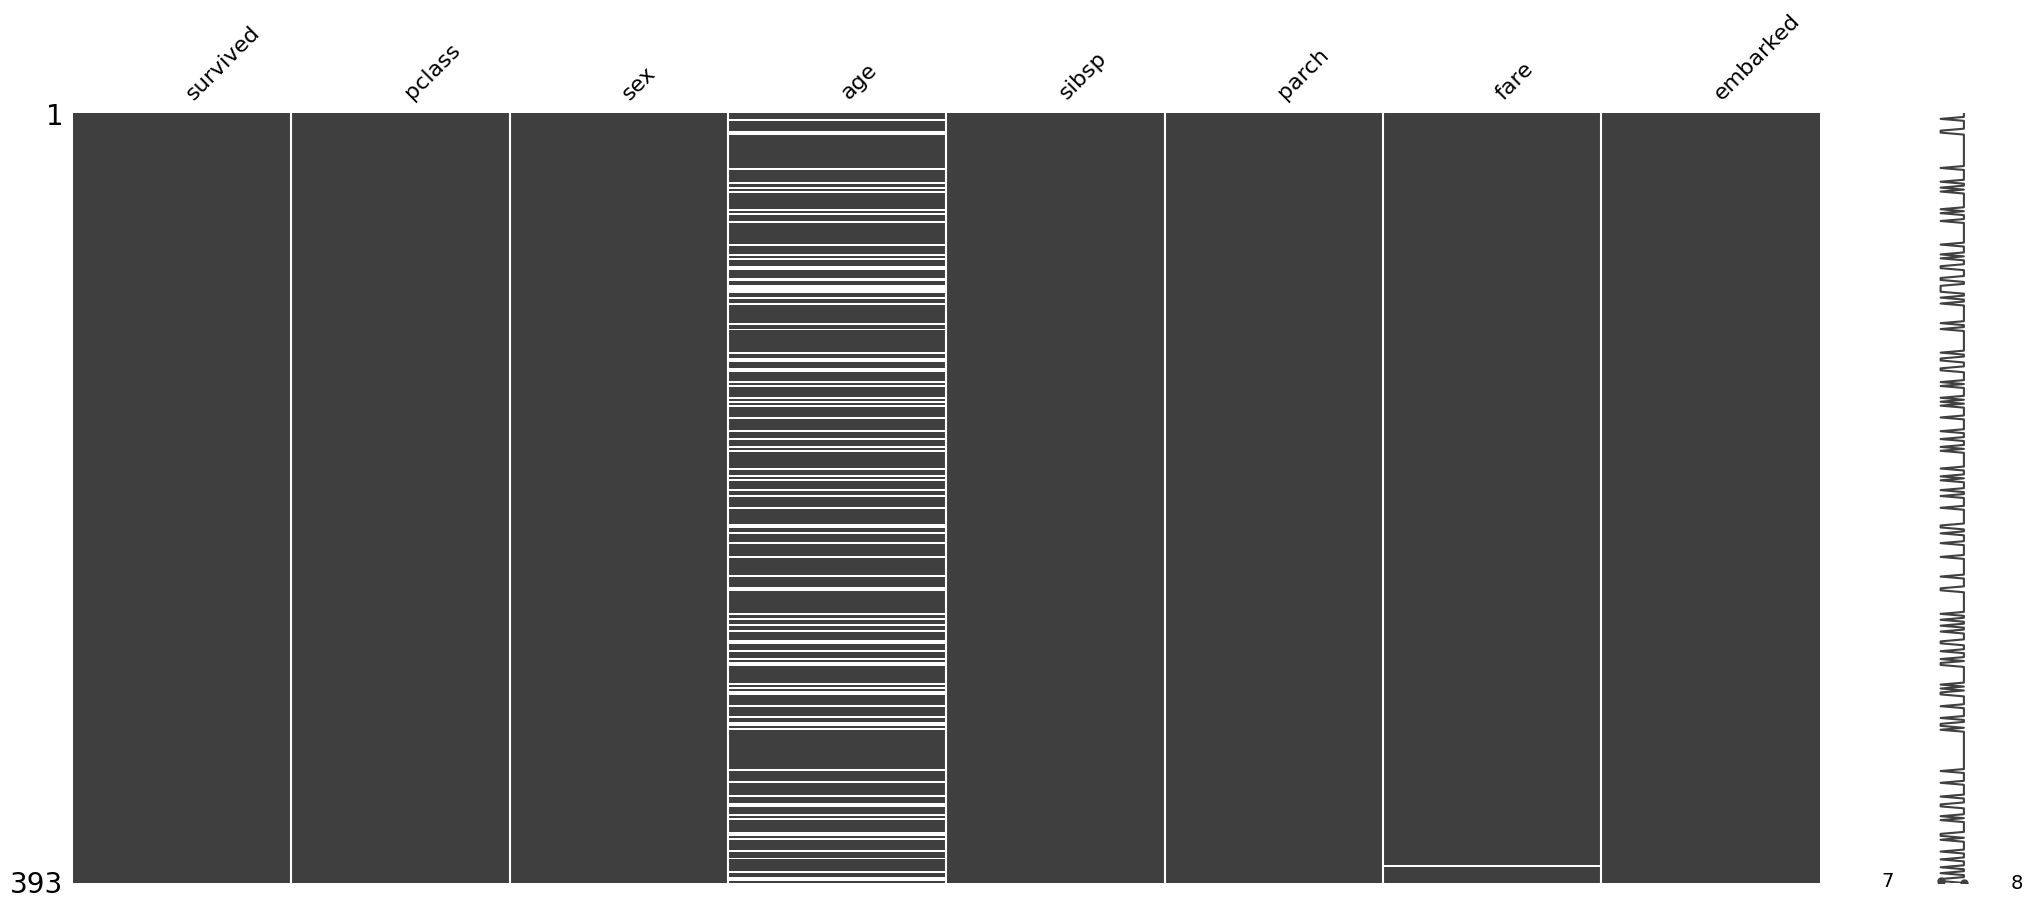

In [61]:
msno.matrix(titanic_test);

Vemos que en la variable `fare` hay un valor perdido, _afortunadamente_ hemos previsto antes esta circunstancia guardando las medias de sus valores dependiendo de la clase del pasajero (fijaos que este valor perdido podría haber aparecido en los datos de entrenamiento, cambiando la semilla que se usa para partir los datos cambiaremos en que parte de los datos esta)

In [62]:
titanic_test.loc[titanic_test['fare'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
1225,0,3,male,60.5,0,0,NaN,S


Podemos ver que es un pasajero de tercera clase, asi que usamos la media para _fare_ de esa clase para imputarlo

In [ ]:
titanic_test.loc[titanic_test['fare'].isna()] = fare3;

Deberemos aplicar exactamente el mismo preproceso que antes usando los mismos criterios y los modelos de preproceso ajustados con el conjunto de entrenamiento

In [64]:
# Convertimos la variable _Sex_
titanic_test['sex'] = titanic_test['sex'].astype('category').cat.codes

In [65]:
# Imputamos la variable _Embarked_ con el valor 'S'
titanic_test.loc[titanic_test['embarked'].isna(),'embarked'] = 'S'

In [66]:
# Transformamos la variable _Embarked_ usando one-hot encoding
dummies = pd.get_dummies(titanic_test['embarked'], drop_first=True, prefix='embarked', prefix_sep='_')
titanic_test = pd.concat([titanic_test,dummies], axis=1)
titanic_test.drop(columns=['embarked'], inplace=True)
#  bug?
if 'embarked_C' in list(titanic_test.columns):
    titanic_test.drop(columns=['embarked_C'], inplace=True) 


In [67]:
# Imputamos la variable Age usando el modelo de imputacion entrenado con los datos de entenamiento
data = titanic_test.loc[:,'pclass':'embarked_S'].values
iage = knni_age.transform(data)[:,2]
titanic_test['iage'] = iage
titanic_test.drop(columns=['age'], inplace=True)

In [68]:
# Calculamos la variable binarizada de la edad
titanic_test['adult'] = bin_age.transform(titanic_test['iage'].values.reshape(-1, 1))

In [69]:
# Aplicamos la transformacion Yeo-Johnson a _Fare_
titanic_test['fare_yj'] = yj_power.transform(titanic_test['fare'].values.reshape(-1, 1))
titanic_test.drop(columns=['fare'], inplace=True)

In [ ]:
# Estandarizamos los datos
titanic_test.loc[:,'pclass':'fare_yj'] = titanic_scaler.transform(titanic_test.loc[:,'pclass':'fare_yj']);
titanic_test.head()

Ahora podemos guardar el conjunto de datos preprocesado para poder trabajar con el más tarde

In [71]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)

In [72]:
print(f"Total Running time {timedelta(seconds=(time() - init_time))}")

Total Running time 1:01:22.207945


Ara intentem predir el preu del tiquet a partir de la classe social

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = titanic_train[['pclass']]
y = titanic_train['fare_yj']
X_t = titanic_test[['pclass']]
y_t = titanic_test['fare_yj']

reg = LinearRegression().fit(X, y)
reg.score(X,y)
#Y = reg.predict(X_t)

0.4126556490702894